In [124]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
import sys; sys.path.append('..')
import os, random, math
import pyzx as zx
from fractions import Fraction
from pyzx.phasepoly import circuit_phase_polynomial_blocks, optimize_block
%config InlineBackend.figure_format = 'svg'
zx.quantomatic.quantomatic_location = r'C:\Users\John\Desktop\scala.jar'
zx.todd.TOPT_LOCATION = os.path.expanduser("~/projects/pyzx/TOpt")

In [324]:
#circ_name = r'../circuits/Arithmetic_and_Toffoli/gf2^5_mult_before'
circ_name = r'../circuits/Fast/adder_8_before'
c_orig = zx.Circuit.load(circ_name).to_basic_gates()
print(c_orig.stats())
# a = zx.Circuit(c_orig.qubits)
# a.gates = c_orig.gates[:len(c_orig.gates)//2]
# b = zx.Circuit(c_orig.qubits)
# b.gates = c_orig.gates[len(c_orig.gates)//2:]
# print(a.stats())
# print(b.stats())
# g1 = a.to_graph()
# g2 = b.to_graph()
# zx.simplify.full_reduce(g1, quiet=False)
# c1 = zx.extract.streaming_extract(g1)
# c1 = zx.optimize.basic_optimization(c1.to_basic_gates())
# print(c1.stats())
# zx.simplify.full_reduce(g2, quiet=False)
# c2 = zx.extract.streaming_extract(g2)
# c2 = zx.optimize.basic_optimization(c2.to_basic_gates())
# print(c2.stats())
g = c_orig.to_graph()
zx.simplify.full_reduce(g, quiet=True)
circuit = zx.extract.streaming_extract(g)
print(circuit.to_basic_gates().stats())
c = zx.optimize.basic_optimization(circuit.to_basic_gates())
print(c.stats())
#zx.draw(c, figsize=(20,4))

Circuit adder_8_before on 24 qubits with 1014 gates.
        399 T-like gates
        615 Cliffords among which 
        409 2-qubit gates and 194 Hadamard gates.
Circuit  on 24 qubits with 5509 gates.
        173 T-like gates
        5336 Cliffords among which 
        2567 2-qubit gates and 2694 Hadamard gates.
Circuit  on 24 qubits with 2713 gates.
        173 T-like gates
        2540 Cliffords among which 
        2203 2-qubit gates and 164 Hadamard gates.


In [294]:
c1.tcount() + c2.tcount()

1817

In [295]:
c = zx.Circuit(c1.qubits)
c.gates = c1.gates.copy()
c.gates.extend(c2.gates)
print(c.stats())
c = zx.optimize.basic_optimization(c)
print(c.stats())

Circuit  on 35 qubits with 50920 gates.
        1817 T-like gates
        49103 Cliffords among which 
        42454 2-qubit gates and 2217 Hadamard gates.
Circuit  on 35 qubits with 50786 gates.
        1817 T-like gates
        48969 Cliffords among which 
        42344 2-qubit gates and 2198 Hadamard gates.


In [284]:
a = [1,2,3,4,5]
a[:len(a)//2], a[len(a)//2:]

([1, 2], [3, 4, 5])

In [327]:
zx.todd.TOPT_LOCATION = os.path.expanduser("~/projects/pyzx/TOpt")
zx.todd.USE_REED_MULLER = False
#zx.todd.TOPT_LOCATION = None
#%prun c2 = phase_block_optimize(c, quiet=False)
c2 = phase_block_optimize(c2.to_basic_gates(), quiet=False)
print(c2.stats())
#zx.draw(c2, figsize=(60,5))

1.2.3.4.new block
TOpt: : 0
new block
TOpt: : 0.421875
new block
TOpt: : 0.546875
new block
TOpt: : 0.03125
new block
TOpt: : 0.015625
new block
TOpt: : 0.03125
new block
TOpt: : 0.015625
new block
TOpt: : 0.015625
new block
TOpt: : 0.015625
new block
TOpt: : 0.03125
new block
TOpt: : 0.015625
new block
new block
TOpt: : 0
new block
TOpt: : 0.015625
new block
TOpt: : 0.03125
new block
TOpt: : 0.03125
new block
TOpt: : 0
new block
new block
TOpt: : 0.015625
new block
TOpt: : 0
new block
TOpt: : 0
new block
TOpt: : 0
new block
TOpt: : 0.015625
new block
TOpt: : 0
new block
TOpt: : 0
new block
TOpt: : 0
new block
TOpt: : 0
new block
TOpt: : 0
new block
TOpt: : 0
new block
TOpt: : 0
new block
TOpt: : 0.015625
new block
TOpt: : 0
new block
TOpt: : 0
new block
TOpt: : 0
new block
TOpt: : 0.03125
new block
TOpt: : 0
new block
TOpt: : 0
new block
TOpt: : 0
new block
TOpt: : 0.015625
new block
TOpt: : 0.015625
new block
TOpt: : 0.03125
new block
TOpt: : 0.015625
new block
TOpt: : 0.03125
new bl

In [312]:
zx.compare_tensors(c_orig, c2)

True

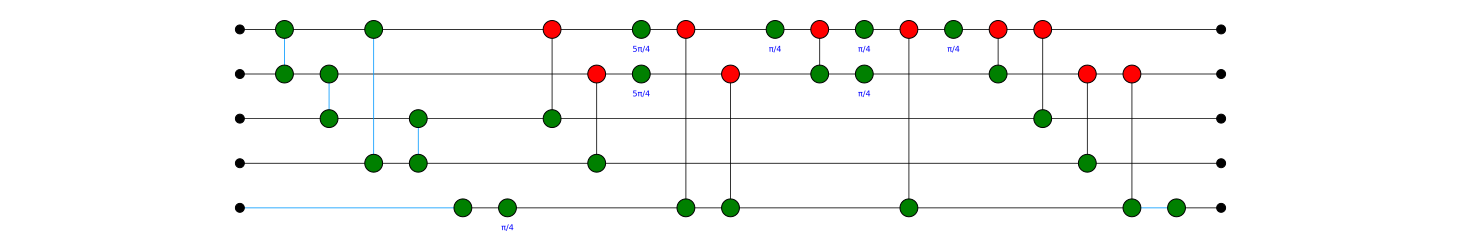

In [313]:
zx.draw(c, figsize=(20,3))

In [306]:
o = Optimizer(c2.to_basic_gates())
c = o.parse_circuit()
print(c.stats())

Circuit  on 5 qubits with 23 gates.
        7 T-like gates
        16 Cliffords among which 
        14 2-qubit gates and 2 Hadamard gates.


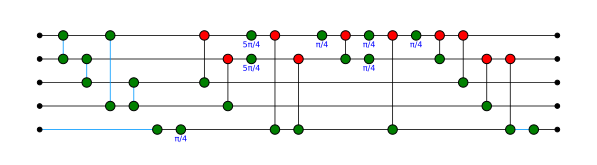

In [304]:
zx.draw(c)

In [189]:
zx.compare_tensors(c2, c_orig)

True

In [40]:
from pyzx.todd import phase_gates_to_poly, remove_trivial_cols
gates = [g for g in c2.gates if g.name != 'HAD']
phase_poly, parity_polys = phase_gates_to_poly(gates, 15)
m = phase_poly.to_par_matrix()
m = m.transpose()
remove_trivial_cols(m)
m = m.transpose()
m2 = m.copy()
print(sum(sum(r) for r in m2.data))
minimize_ones(m2)
print(sum(sum(r) for r in m2.data))
#m2.gauss(full_reduce=True)
m2 = m2.transpose()
data = [r for r in m2.data if sum(r) <= 4]
print(len(data))
bad_cols = [i for i,r in enumerate(m2.data) if sum(r) > 6]
print(bad_cols)
m2 = m2.transpose()
minimize_ones(m2, bad_cols)
print(sum(sum(r) for r in m2.data))
m2 = m2.transpose()
data = [r for r in m2.data if sum(r) <= 4]
print(len(data))
m3 = zx.linalg.Mat2(data).transpose()
print(m3)

550
402
43
[9, 21, 40, 44, 47, 56, 77, 86]
402
43
[ 0  0  1  0  1  0  0  0  0  0  0  0  0  1  1  1  1  1  0  1  1  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0  1  1  0  0  0  0  1  0  1  0  0  1  1  0  1  0  0  1  1  0  0  1  0  1  0  0  0  0  0  0  0  1  0  0  0 ]
[ 1  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  1  0  0  0  1  0  1  1  1 ]
[ 0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  1  1  0  1  0  1  0  0  1  0  0 ]
[ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  1  1  0  1  0  0  0  0  0  0  1  1  0  1  1  1  0  0  0  0  0  0  0  0  0  1  0  0 ]
[ 0  1  1  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ]
[ 0  0  0  1  0  0  0  0  0  0  1  0  0  1  0  0  1  0  0  0  0  1  0  1  0  0  0  0  0  0  1  0  1  0  0  0  1  0  1  0  0  0  1 ]
[ 0  0  0  0  1  0  0  1  

In [109]:
m3.cols()

24

In [16]:
import itertools

def minimize_ones(m, ignore_cols=[]):
    rows = m.rows()
    while True:
        for a in range(rows):
            r1 = m.data[a]
            s1 = sum(1 for i,v in enumerate(r1) if v and i not in ignore_cols)
            should_break = False
            for b in range(a+1,rows):
                r2 = m.data[b]
                s2 = sum(1 for i,v in enumerate(r2) if v and i not in ignore_cols)
                if sum(1 for s,t in zip(r1,r2) if s+t==1) < max(s1,s2):
                    if s1 > s2:
                        m.row_add(b,a)
                    else: m.row_add(a,b)
                    should_break = True
                    break
            if should_break: break
        else:
            break

def pick_rows(m):
    m2 = m.transpose()
    data = [r for r in m2.data if sum(r) <= 4]
    m = zx.linalg.Mat2(data).transpose()
    rows = m.rows()
    cols = m.cols()
    for a in range(rows):
        r1 = m.data[a]
        if sum(r1) < 3: continue
        for b in range(a+1,rows):
            #print(a,b)
            r2 = m.data[b]
            if sum(r2) < 3: continue
            other_rows = set()
            for i,v in enumerate(r1):
                if not v: continue
                for c in range(rows):
                    if m.data[c][i]: other_rows.add(c)
            for i,v in enumerate(r2):
                if not v: continue
                for c in range(rows):
                    if m.data[c][i]: other_rows.add(c)
            other_rows.discard(a)
            other_rows.discard(b)
            for c,d in itertools.combinations(other_rows, 2):
                correct_cols = []
                bad_cols = []
                neg_cols = []
                targets = {a,b,c,d}
                s = set(range(rows))
                s.remove(a)
                s.remove(b)
                s.remove(c)
                s.remove(d)
                for col in range(cols):
                    v = sum(m.data[i][col] for i in s)
                    if not v:
                        correct_cols.append([m.data[i][col] for i in range(rows)])
                    elif v == 1:
                        bad_cols.append([m.data[i][col] for i in range(rows)])
                    v = sum(m.data[i][col] for i in targets)
                    if not v:
                        neg_cols.append([m.data[i][col] for i in range(rows)])
                if len(correct_cols) > 7:
                    return a,b,c,d, correct_cols
                if len(correct_cols) > 6:
                    print("almost")
                    print(a,b,c,d)
                    data = correct_cols.copy()
                    data.extend(bad_cols)
                    data.extend(neg_cols)
                    m3 = zx.linalg.Mat2(data).transpose()
                    print(m3)

In [41]:
pick_rows(m3)

In [48]:
m2 = m.copy()
minimize_ones(m2)
print(m2)

[ 0  0  0  0  0  0  0  0  1  0  0  1  1  0  0  0  0  1  0  0  0  1  0  1  0  0  0  1  0  1  0  1  1  0  0  0  0  1  0  0  1  0  0  0  0  1  0  0  1  1  1  0  1  1  0 ]
[ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  1  0  0  1  0  0  1  0  1  0  1  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0 ]
[ 0  1  0  1  0  0  0  1  1  1  1  1  0  1  0  0  0  1  1  0  0  1  0  0  0  1  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  1  1  0  0  0  1  0  0  0  0  0  0  0 ]
[ 1  0  1  1  0  1  0  0  0  0  1  0  1  0  0  0  0  0  0  1  0  0  0  1  1  0  1  1  0  0  0  1  0  0  0  1  1  1  0  0  0  0  0  0  1  0  0  0  1  0  0  1  1  1  0 ]
[ 0  0  1  0  0  1  0  1  0  0  0  1  0  0  0  0  0  0  0  0  1  1  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  1  0  0  0  0  1  0 ]
[ 0  0  0  0  1  0  0  0  0  1  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0 

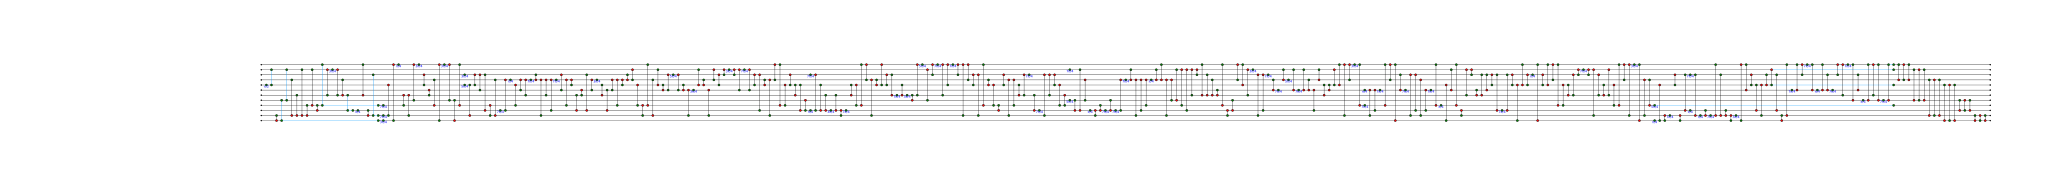

In [13]:
zx.draw(c, figsize=(70,6))

In [ ]:
from pyzx.todd import todd_simp

In [212]:
zx.compare_tensors(c, circuit)

False

succes!
True True


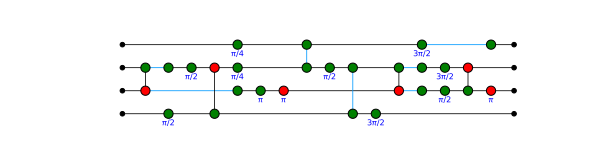

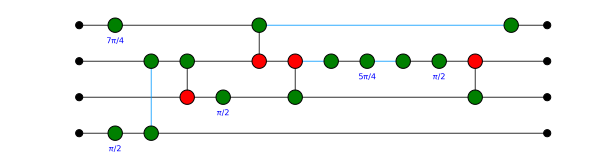

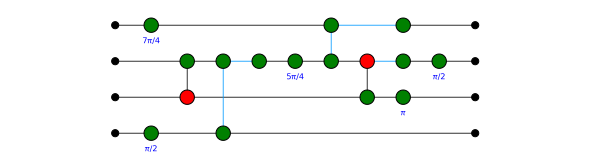

In [254]:
from pyzx.circuit import T
def generate_clifford():
    g = zx.generate.cliffords(4,9)
    zx.simplify.to_gh(g)
    return Optimizer(zx.Circuit.from_graph(g)).parse_circuit(1)

i = 0
while True:
    i += 1
    if i%50 == 0:
        print(i, end='.')
    c1 = generate_clifford()
    c2 = generate_clifford()
    c1.add_gate(T(0))
    c1.add_gate(T(1))
    c1.add_circuit(c2)
    g = c1.to_graph()
    zx.simplify.clifford_simp(g,quiet=True)
    c2 = zx.extract.streaming_extract(g)
    o = Optimizer(c2.to_basic_gates())
    c2 = o.parse_circuit()
    c3 = Optimizer(c1).parse_circuit()
    if not zx.compare_tensors(c1,c3):
        print("Errawr")
        break
    #c3 = Optimizer(c3).parse_circuit()
    c3, blocks = circuit_phase_polynomial_blocks(c3,optimize=True)
    c3 = Optimizer(c3).parse_circuit()
    if not zx.compare_tensors(c1,c3):
        print("Errawr2")
        break
    #c3 = Optimizer(c3).parse_circuit()
#     c3, blocks = circuit_phase_polynomial_blocks(c3,optimize=True)
#     c3 = Optimizer(c3).parse_circuit()
    two_qubit = sum(1 for g in c3.gates if g.name in ('CZ', 'CNOT'))
    if two_qubit < 6 and len(c2.gates) < len(c3.gates) and sum(1 for g in c2.gates if g.name in ('CZ', 'CNOT')) < two_qubit:
        print("succes!")
        break

print(zx.compare_tensors(c1,c2),zx.compare_tensors(c1,c3))
display(zx.draw(c1))
display(zx.draw(c3))
display(zx.draw(c2))

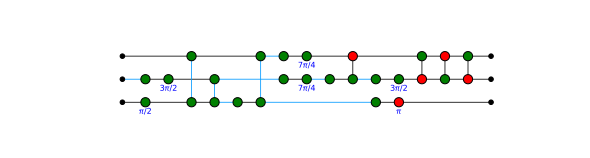

Match!
CZ(1,2) CNOT(1,2)
[CNOT(2,0)] [CNOT(1,2)]
[CNOT(1,2), CNOT(2,0)] [CNOT(0,1), ZPhase(1,phase=7/4), HAD(1), CNOT(1,2)]
[CNOT(2,0), S(2)] [CNOT(1,2), S(1)]
[S*(2), CNOT(1,2), CNOT(2,0), S(2)] [CNOT(0,1), ZPhase(1,phase=7/4), HAD(1), CNOT(1,2), S(1)]
[9.7, 9.8, 10, 11] [4, 5, 8, 9.8, 12]


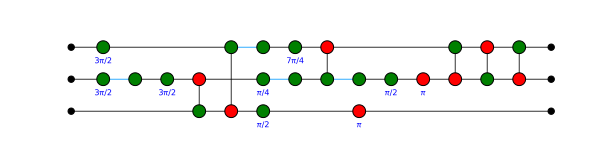

In [244]:
g = c1.to_graph()
zx.simplify.clifford_simp(g,quiet=True)
c2 = zx.extract.streaming_extract(g)
#c4 = c1.copy()
#c4.gates = list(reversed(c4.gates))
o = Optimizer(c1)
#o.minimize_czs = True
display(zx.draw(o.parse_forward()))
c3 = o.parse_circuit()
#display(zx.draw(c1))
zx.draw(c3)

In [245]:
zx.compare_tensors(c1,c3)

True

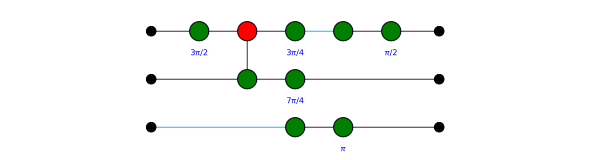

In [182]:
c3 = Optimizer(c3.to_basic_gates()).parse_circuit()
zx.draw(c3)